# Assignment 2 - Artificial Intelligence techniques

Review of different pre-processing and transformations techniques applied to an image of a vehicle plate.


In [1]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.6.0


## Resizing

When we need to change the size of an image, some pixels are lost. To rebuild the image, we can use different interpolation techniques. The most common are: nearest neighbor, bilinear, bicubic, and b-splines.

Load the image


Image shape: (687, 918, 3)


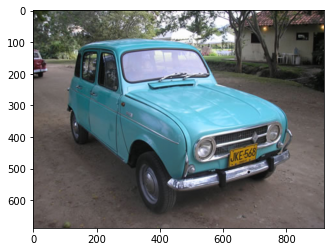

In [2]:
img = cv2.imread('img/plate.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image shape:", img.shape)
plt.imshow(img)
plt.show()


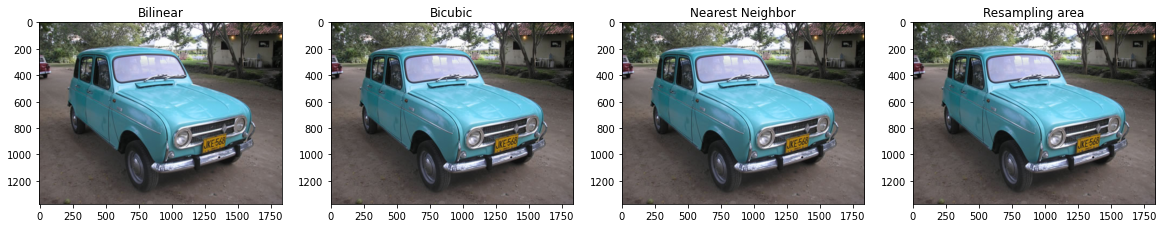

In [3]:
h, w, c = img.shape

f = 2
# cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]	)
img_bilinear = cv2.resize(img, (f*w, f*h), fx=1, fy=1,
                          interpolation=cv2.INTER_LINEAR)

img_bicubic = cv2.resize(img, (f*w, f*h), fx=1, fy=1,
                         interpolation=cv2.INTER_CUBIC)

img_nearest = cv2.resize(img, (f*w, f*h), fx=1, fy=1,
                         interpolation=cv2.INTER_NEAREST)

img_area = cv2.resize(img, (f*w, f*h), fx=1, fy=1,
                      interpolation=cv2.INTER_AREA)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img_bilinear)
plt.title("Bilinear")

plt.subplot(1, 4, 2)
plt.imshow(img_bicubic)
plt.title("Bicubic")

plt.subplot(1, 4, 3)
plt.imshow(img_nearest)
plt.title("Nearest Neighbor")

plt.subplot(1, 4, 4)
plt.imshow(img_area)
plt.title("Resampling area")

plt.show()


## Color spaces conversion

There are many color spaces. The most common are:

- Grayscale
- RGB
- XYZ
- HSL
- LUV
- YCrCb

The RGB color space is the most common one. It is based on the additive mixing of red, green, and blue light. The HSV color space is based on the hue, saturation, and value. The YCbCr color space is based on the luminance and chrominance components. The YIQ color space is based on the luminance and chrominance components.

[cv2 color conversion codes](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)


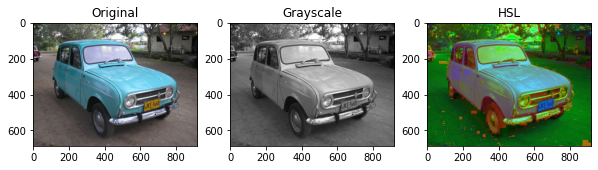

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_hsl = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")

plt.subplot(1, 3, 3)
plt.imshow(img_hsl)
plt.title("HSL")

plt.show()


## Thresholding

When we need to segment an image, we can use thresholding. Thresholding is a technique that converts an image to a binary image. The thresholding technique is based on the pixel value. If the pixel value is greater than the threshold, the pixel is set to 1, otherwise, it is set to 0.

<div align="center">

![threshold types](https://docs.opencv.org/4.6.0/threshold.png)

</div>


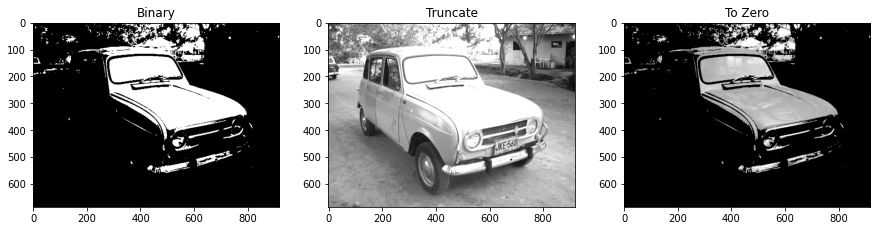

In [5]:
# cv.threshold(src, thresh, maxval, type[, dst]	)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.threshold(img_gray, 150, 255,
           cv2.THRESH_BINARY)[1], cmap='gray')
plt.title("Binary")

plt.subplot(1, 3, 2)
plt.imshow(cv2.threshold(img_gray, 150, 255, cv2.THRESH_TRUNC)[1], cmap='gray')
plt.title("Truncate")

plt.subplot(1, 3, 3)
plt.imshow(cv2.threshold(img_gray, 150, 255,
           cv2.THRESH_TOZERO)[1], cmap='gray')
plt.title("To Zero")

plt.show()


### Adaptive thresholding

OpenCV provides a function to apply adaptive thresholding. There are two types of adaptive thresholding: mean and gaussian. The mean thresholding is based on the mean of the neighborhood. The gaussian thresholding is based on the gaussian weighted sum of the neighborhood.


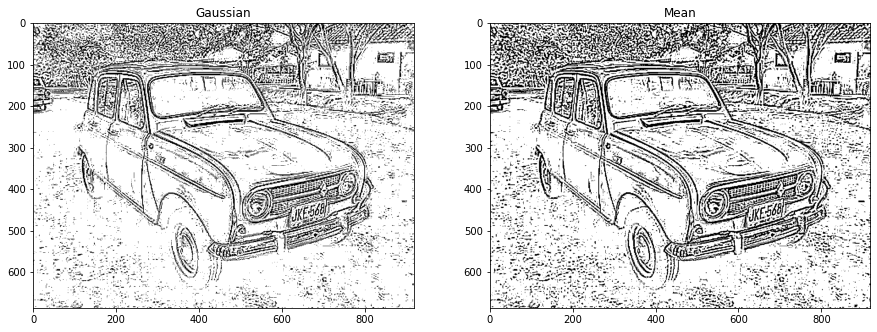

In [6]:
# cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.adaptiveThreshold(img_gray, 255,
           cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 3), cmap='gray')
plt.title("Gaussian")

plt.subplot(1, 2, 2)
plt.imshow(cv2.adaptiveThreshold(img_gray, 255,
           cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 3), cmap='gray')
plt.title("Mean")

plt.show()


## Filters

### Linear filters

With the `cv2.filter2D` function, we can perform a convolution between an image and a kernel. The kernel is a matrix that is applied to the image. The kernel is applied to each pixel of the image.

$$
f(x,y) =g(x,y)*h(x,y)= \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty} h(i,j)g(x-i,y-j)
$$


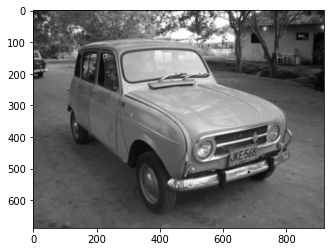

In [16]:
k = np.array([[1, 7, 1],
              [7, 1, 7],
              [1, 7, 1]])
k = k/np.sum(k)

# cv2.filter2D(im-Origen, ddepth, Kernel)
plt.imshow(cv2.filter2D(src=img_gray, ddepth=-1, kernel=k), cmap='gray')
plt.show()


### Smoothing filters

These filters are used to reduce the noise in the image. The most common smoothing filters are: mean, gaussian, median, and bilateral.


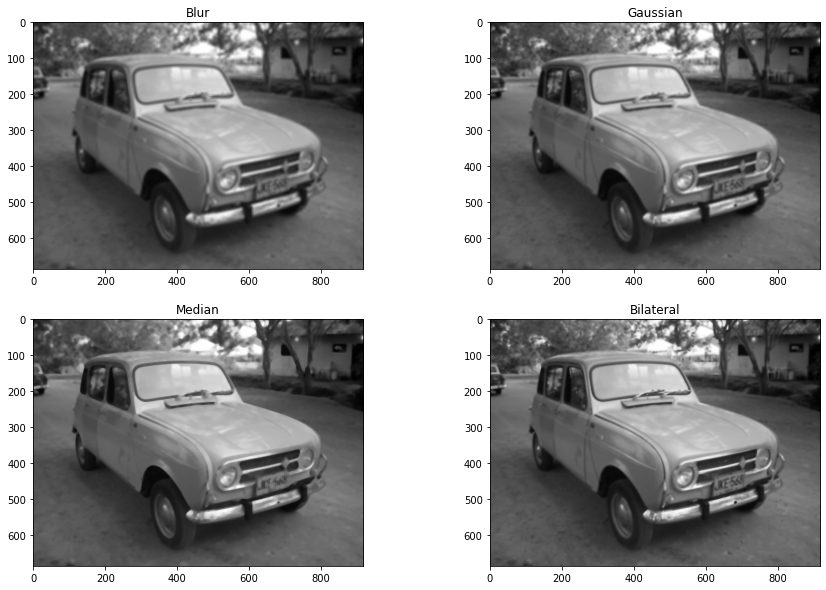

In [8]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.blur(src=img_gray, ksize=(9, 9)), cmap='gray')
plt.title("Blur")

plt.subplot(2, 2, 2)
plt.imshow(cv2.GaussianBlur(src=img_gray, ksize=(9, 9), sigmaX=3), cmap='gray')
plt.title("Gaussian")

plt.subplot(2, 2, 3)
plt.imshow(cv2.medianBlur(src=img_gray, ksize=9), cmap='gray')
plt.title("Median")

plt.subplot(2, 2, 4)
plt.imshow(cv2.bilateralFilter(src=img_gray, d=9,
           sigmaColor=75, sigmaSpace=75), cmap='gray')
plt.title("Bilateral")

plt.show()


### Edge detection filters

There are many edge detection filters. The most common are: Sobel, Laplacian, Canny and Prewitt.

##### Sobel filter

The Sobel filter is based on the first derivative of the image and it is used to detect vertical and horizontal edges. The Sobel filter use two kernels: one for the horizontal direction and one for the vertical direction. The kernels are shown below.

$$
\begin{gather*}
    \begin{bmatrix}
        -1 & 0 & 1 \\
        -2 & 0 & 2 \\
        -1 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        -1 & -2 & -1 \\
        0 & 0 & 0 \\
        1 & 2 & 1
    \end{bmatrix}
\end{gather*}
$$


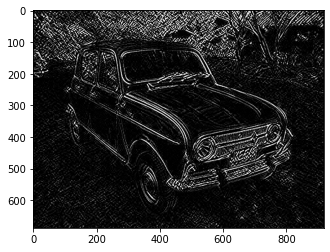

In [9]:
plt.imshow(cv2.Sobel(src=img_gray, ddepth=-1,
           dx=1, dy=1, ksize=5), cmap='gray')
plt.show()


#### Laplacian filter

The laplacian filter is based on the second derivative of the image and it is used to detect edges.

$$
\begin{gather*}
    \nabla^2f=\frac{\partial^2f}{\partial x^2}+\frac{\partial^2f}{\partial y^2}\\
    \nabla^2f=[f(x+1,y)+f(x-1,y)-2f(x,y)]+[f(x,y+1)+f(x,y-1)-2f(x,y)]
\end{gather*}
$$

The laplacian filter is based on the following kernel.

$$
\begin{bmatrix}
    0 & 1 & 0 \\
    1 & -4 & 1 \\
    0 & 1 & 0
\end{bmatrix}
$$


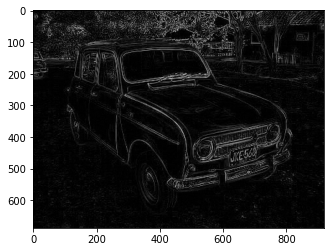

In [10]:
plt.imshow(cv2.Laplacian(src=img_gray, ddepth=-1, ksize=3), cmap='gray')
plt.show()


#### Canny filter

The Canny filter use an algorithm to detect edges. The algorithm is based on the gradient of the image. The algorithm is composed of 5 steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
1. Find the magnitude of the gradient
1. Apply non-maximum suppression to get rid of spurious response to edge detection
1. Apply double threshold to determine potential edges
   1. Strong edges
   1. Weak edges
1. Follow edges (hysteresis) to detect the edges. The weak edges are connected to strong edges.

[Canny filter description](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)


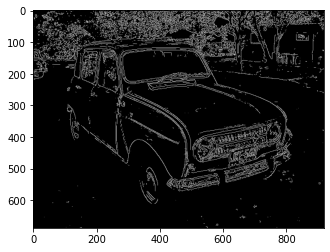

In [11]:
plt.imshow(cv2.Canny(image=img_gray, threshold1=100,
           threshold2=100), cmap='gray')
plt.show()


#### Prewitt filter

This filters use 8 kernels to detect edges, one in each direction.


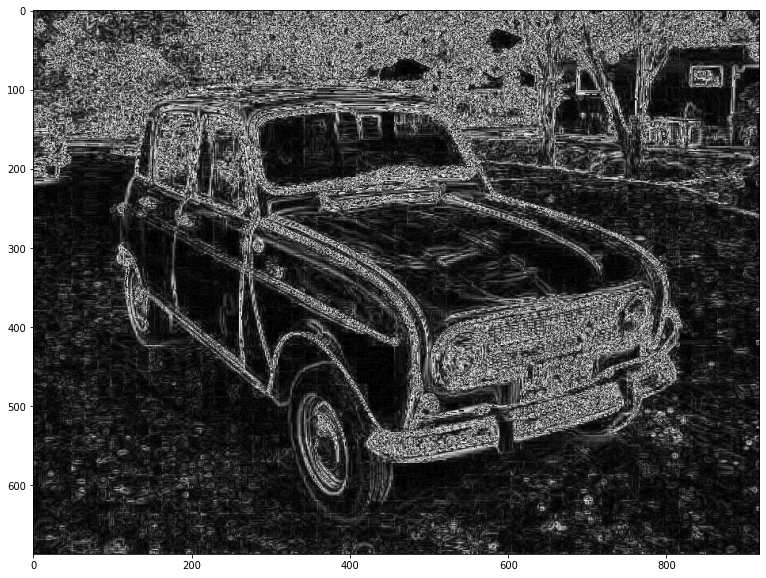

In [12]:
N = np.array([[-1, -1, -1],
              [1, -2, 1],
              [1, 1, 1]])
N = cv2.filter2D(src=img_gray, ddepth=-1, kernel=N)

NE = np.array([[1, -1, -1],
               [1, -2, -1],
               [1, 1, 1]])
NE = cv2.filter2D(src=img_gray, ddepth=-1, kernel=NE)

E = np.array([[1, 1, -1],
              [1, -2, -1],
              [1, 1, -1]])
E = cv2.filter2D(src=img_gray, ddepth=-1, kernel=E)

SE = np.array([[1, 1, 1],
               [1, -2, -1],
               [1, -1, -1]])
SE = cv2.filter2D(src=img_gray, ddepth=-1, kernel=SE)

S = np.array([[1, 1, 1],
              [1, -2, 1],
              [-1, -1, -1]])
S = cv2.filter2D(src=img_gray, ddepth=-1, kernel=S)

SW = np.array([[1, 1, 1],
               [-1, -2, 1],
               [-1, -1, 1]])
SW = cv2.filter2D(src=img_gray, ddepth=-1, kernel=SW)

W = np.array([[-1, 1, 1],
              [-1, -2, 1],
              [-1, 1, 1]])
W = cv2.filter2D(src=img_gray, ddepth=-1, kernel=W)

NW = np.array([[-1, -1, 1],
               [-1, -2, 1],
               [1, 1, 1]])
NW = cv2.filter2D(src=img_gray, ddepth=-1, kernel=NW)


plt.figure(figsize=(15, 10))
plt.imshow(N+NE+E+SE+S+SW+W+NW, cmap='gray')
plt.show()
